In [1]:
from IPython.display import display, Markdown

# Your title text
title = "Work Flow PB28 Detection"

# Display the title using Markdown
display(Markdown(f"# {title}"))


# Work Flow PB28 Detection

In [2]:
from IPython.display import display, Markdown

# Your subtitle text
subtitle = "Multiprocessor Download PB28"

# Display the subtitle using Markdown
display(Markdown(f"## {subtitle}"))



## Multiprocessor Download PB28

In [2]:
import os
from obspy import read
from datetime import datetime, timedelta
import requests
from io import BytesIO
import zipfile
from multiprocessing import Pool
import time

# URL for seismic waveform data in SAC.zip format
base_url = "http://service.iris.edu/fdsnws/dataselect/1/query"

# Specify the network, station, channel, format, and the desired time range
network = "TX"
station = "PB28"
channel = "HHZ"
format_type = "sac.zip"

# Specify the directory on the ejectable disk located at /Volumes/Marco/SeismicData
marco_disk_path = os.path.join('/', 'Volumes', 'Marco', 'SeismicDataTEXAS','PB28','20232024')

# Create the directory if it doesn't exist
os.makedirs(marco_disk_path, exist_ok=True)

# Define the start and end dates for the range
start_date = datetime(2023 ,12, 1, 0, 0, 0)
end_date = datetime(2024, 4, 22, 23, 59, 59)

# Function to download and extract data for a given time
def download_and_extract_data(current_time):
    current_time_str = current_time.strftime("%Y-%m-%dT%H:%M:%S")
    params = {
        'net': network,
        'sta': station,
        'cha': channel,
        'format': format_type,
        'starttime': current_time_str,
        'endtime': (current_time + timedelta(hours=1)).strftime("%Y-%m-%dT%H:%M:%S"),
    }

    max_retries = 3  # Number of retries for 413 error
    retries = 0

    while retries < max_retries:
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            with zipfile.ZipFile(BytesIO(response.content), 'r') as zip_ref:
                zip_ref.extractall(marco_disk_path)
            print(f"Downloaded and extracted files for {current_time}")
            break
        elif response.status_code == 413:
            retries += 1
            print(f"Retrying {current_time} (Retry {retries}) due to 413 error...")
            time.sleep(5)  # Wait for a few seconds before retrying
        else:
            print(f"Failed to retrieve data for {current_time}. Status code: {response.status_code}")
            break

if __name__ == "__main__":
    tic = time.time()
    # Specify the number of processes to use (adjust as needed)
    
    num_processes = 8 # we can change this to the desired number of processes

    # Create a multiprocessing pool
    with Pool(num_processes) as pool:
        time_interval = timedelta(hours=1)
        current_time = start_date
        while current_time <= end_date:
            pool.apply_async(download_and_extract_data, (current_time,))
            current_time += time_interval
        
        pool.close()
        pool.join()
        
    toc = time.time()
    print('Done in {:.4f} seconds'.format(toc-tic))


Process SpawnPoolWorker-8:
Process SpawnPoolWorker-1:
Process SpawnPoolWorker-4:
Process SpawnPoolWorker-6:
Process SpawnPoolWorker-7:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-5:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/magarciafer/

Process SpawnPoolWorker-15:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-17:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", l

Process SpawnPoolWorker-29:
Process SpawnPoolWorker-28:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", l

Process SpawnPoolWorker-40:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-41:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", l

Process SpawnPoolWorker-52:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-54:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", l

Process SpawnPoolWorker-64:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-65:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", l

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-77:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError:

Process SpawnPoolWorker-89:
Process SpawnPoolWorker-90:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-91:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/mu

Process SpawnPoolWorker-101:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-102:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-114:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-113:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-126:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._t

Process SpawnPoolWorker-138:
Process SpawnPoolWorker-137:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-149:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-150:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anacond

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-175:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-195:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)


Process SpawnPoolWorker-223:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-224:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-236:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._t

Process SpawnPoolWorker-247:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-248:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-259:
Process SpawnPoolWorker-260:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-272:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-273:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-284:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-285:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-294:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-297:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-309:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-308:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-320:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-321:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-333:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-332:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-343:
Process SpawnPoolWorker-345:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-360:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-361:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-373:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-374:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-385:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-387:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-399:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-398:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-410:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-411:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-422:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-424:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-434:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-435:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-447:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-448:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-459:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-461:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-471:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-472:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-483:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-484:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-495:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-496:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-507:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-508:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-520:
Process SpawnPoolWorker-519:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-532:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-533:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-546:
Process SpawnPoolWorker-545:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-561:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError

Process SpawnPoolWorker-574:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-573:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-586:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-585:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-597:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-598:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-610:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-609:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-621:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-622:
Process SpawnPoolWorker-623:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", li

Process SpawnPoolWorker-634:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-633:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-646:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-647:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-659:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-660:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-671:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-672:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-682:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError

Process SpawnPoolWorker-694:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-695:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-706:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-707:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-718:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-719:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-730:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-731:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-743:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-744:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-756:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-757:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-769:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-770:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-781:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-782:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-793:
Process SpawnPoolWorker-795:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-805:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-806:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-817:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError

Process SpawnPoolWorker-828:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-829:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-840:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-841:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-853:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-852:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-863:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-865:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-877:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)


  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/an

Process SpawnPoolWorker-901:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-902:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-913:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-914:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-932:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)


Process SpawnPoolWorker-944:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-945:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-958:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-959:
Process SpawnPoolWorker-960:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9

Process SpawnPoolWorker-970:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-971:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-983:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-984:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-996:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    re

Process SpawnPoolWorker-1007:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1008:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1020:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-1031:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1032:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1044:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1045:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1056:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1057:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1069:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1068:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1080:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1081:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1092:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1093:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1104:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1105:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1117:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1129:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

Process SpawnPoolWorker-1140:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1141:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1153:
Process SpawnPoolWorker-1152:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queu

Process SpawnPoolWorker-1164:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1162:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1175:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1176:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1187:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1188:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1199:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1200:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1211:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1212:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1223:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1225:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1236:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1237:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1248:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1249:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1262:
Process SpawnPoolWorker-1260:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1272:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1274:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1284:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1285:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1316:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1317:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1329:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1330:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1341:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1342:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1353:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1354:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1365:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1366:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1377:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1378:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1390:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)

Process SpawnPoolWorker-1404:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1405:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1418:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1416:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1428:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1429:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1440:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1441:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1452:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1453:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1464:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

Process SpawnPoolWorker-1475:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1476:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1488:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1487:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1499:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1500:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1512:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1511:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1523:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1524:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1535:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1536:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1547:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1548:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1559:
Process SpawnPoolWorker-1560:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1571:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1572:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1583:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1584:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    s

Process SpawnPoolWorker-1595:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1596:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1608:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1609:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1620:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1621:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1633:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1632:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1645:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  Fi

Process SpawnPoolWorker-1658:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1657:
Process SpawnPoolWorker-1656:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1670:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)

Process SpawnPoolWorker-1688:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1690:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1700:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

Process SpawnPoolWorker-1711:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1712:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1725:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1726:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1737:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1738:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1750:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1751:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1762:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1763:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1775:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-1786:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1787:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1799:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1798:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1810:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1811:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1822:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1823:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1834:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1835:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1848:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1849:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1860:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1862:
Process SpawnPoolWorker-1861:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1873:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

Process SpawnPoolWorker-1884:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1885:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1896:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1897:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1907:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1909:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1920:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1921:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1932:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1933:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1944:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1945:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1957:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1958:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1969:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1970:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1981:
Process SpawnPoolWorker-1982:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-1993:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-1994:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2005:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2006:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2017:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2020:
Process SpawnPoolWorker-2018:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py",

Process SpawnPoolWorker-2030:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2031:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2045:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeErro

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2065:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-2076:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2078:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2088:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2089:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2101:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2100:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2113:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2114:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2126:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2127:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2138:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2139:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2150:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2151:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2163:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2164:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2176:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2175:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2187:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

Process SpawnPoolWorker-2197:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2199:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2211:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

Process SpawnPoolWorker-2221:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2223:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2235:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2236:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2248:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2249:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2260:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2261:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2273:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

Process SpawnPoolWorker-2284:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2286:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2296:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2297:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2308:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2309:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2320:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2321:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2332:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2333:
Process SpawnPoolWorker-2334:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python

Process SpawnPoolWorker-2346:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2345:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2358:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2359:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2370:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2371:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2383:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-2394:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2395:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2407:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2408:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2422:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)

Process SpawnPoolWorker-2441:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2442:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2453:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2454:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2466:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

Process SpawnPoolWorker-2478:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2479:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2491:
Process SpawnPoolWorker-2492:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2503:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2504:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2516:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

Process SpawnPoolWorker-2528:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2529:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2540:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2541:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2552:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2554:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2564:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2565:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2577:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2578:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2589:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2590:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2602:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2604:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2614:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2615:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2625:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2627:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2638:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2639:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2650:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2651:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2662:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2663:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2675:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2674:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2686:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2687:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2699:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-2711:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2710:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2723:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2724:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2736:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2748:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-2759:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2761:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2772:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2773:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2784:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2785:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickle

Process SpawnPoolWorker-2812:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2811:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2824:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-2836:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2837:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2849:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2848:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2860:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2861:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2872:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2873:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2884:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2885:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2896:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-2909:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2910:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2921:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2922:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2934:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2933:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/proc

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2946:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  Fi

Process SpawnPoolWorker-2957:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2958:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2969:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2970:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2981:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2982:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-2993:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2994:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3006:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3007:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3018:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3019:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3031:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3032:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3043:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3044:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3055:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3056:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3068:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-3079:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3080:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3091:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3092:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3104:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-3115:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3116:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3127:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3128:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3139:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3140:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3155:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3156:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3167:
Process SpawnPoolWorker-3169:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3179:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3180:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3192:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3193:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3204:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3205:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3216:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3217:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3228:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3229:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3240:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3241:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3252:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    r

Process SpawnPoolWorker-3265:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3266:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3278:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3279:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3289:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3290:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3301:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3302:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3313:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3314:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3326:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3327:
Traceback 

Process SpawnPoolWorker-3339:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3340:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3351:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3352:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3363:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3364:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3375:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3376:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3386:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-3400:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3399:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3412:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3413:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    s

Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3425:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._

Process SpawnPoolWorker-3436:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3437:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

Process SpawnPoolWorker-3448:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download_and_extract_data' on <module '__main__' (built-in)>
Process SpawnPoolWorker-3450:
Traceback (most recent call last):
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/multiprocessing/process.py

In [96]:
from IPython.display import display, Markdown

# Your subtitle text
subtitle = "Apply High Pass and Trigger Detection and Append to csv file"

# Display the subtitle using Markdown
display(Markdown(f"## {subtitle}"))


## Apply High Pass and Trigger Detection and Append to csv file

In [5]:
import os
import csv
from obspy import read
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, trigger_onset


# Specify the directory on the ejectable disk located at /Volumes/Marco/SeismicData
marco_disk_path = os.path.join('/', 'Volumes', 'Marco', 'SeismicDataTEXAS','PB11')

# Create a CSV file for storing the trigger information or open an existing file for appending
csv_file_path = os.path.join(marco_disk_path, 'trigger_info.csv')

# Check if the CSV file already exists
csv_exists = os.path.exists(csv_file_path)

# Open the CSV file in append mode
with open(csv_file_path, 'a', newline='') as csvfile:
    # Define the CSV header if the file is newly created
    fieldnames = ['SAC_file', 'Station', 'Start_Time', 'End_Time', 'Number_of_Triggers', 'Trigger_Times']

    # Create a CSV writer
    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header to the CSV file if it's a new file
    if not csv_exists:
        csv_writer.writeheader()

    # Loop through each file in the directory
    for filename in os.listdir(marco_disk_path):
        if filename.endswith(".SAC"):
            sac_file_path = os.path.join(marco_disk_path, filename)

            try:
                # Load the SAC file
                stream = read(sac_file_path)

                # Verify that the stream contains at least one trace
                if len(stream) == 0:
                    print(f"Skipping {sac_file_path} as it does not contain any traces.")
                    continue

                # Extract relevant information
                trace = stream[0]
                start_time = trace.stats.starttime
                end_time = trace.stats.endtime

                # Apply high-pass filter at 5 Hz to each trace in the stream
                for tr in stream:
                    tr.data = highpass(tr.data, freq=5, df=tr.stats.sampling_rate, corners=2, zerophase=True)

                # Earthquake detection on the high-pass filtered data
                cft = classic_sta_lta(trace.data, int(1 * trace.stats.sampling_rate), int(10 * trace.stats.sampling_rate))

                # Set trigger levels
                onset_trigger = 8
                end_trigger = 0.5

                # Get trigger onsets
                onset_times = trigger_onset(cft, onset_trigger, end_trigger)

                # Count of triggers
                num_triggers = len(onset_times)

                # Convert trigger times to string for CSV
                trigger_times_str = ', '.join(str(time) for time in onset_times)

                # Write the information to the CSV file
                csv_writer.writerow({
                    'SAC_file': sac_file_path,
                    'Station': trace.stats.station,
                    'Start_Time': start_time,
                    'End_Time': end_time,
                    'Number_of_Triggers': num_triggers,
                    'Trigger_Times': trigger_times_str
                })

            except Exception as e:
                print(f"Skipping {sac_file_path} due to exception: {e}")
                print(f"Data length: {len(trace.data)}")
                print(f"Sampling rate: {trace.stats.sampling_rate}")


# Print a message indicating completion
print(f"Trigger information appended to: {csv_file_path}")


Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.099.232348.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 784
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.099.233043.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.099.233655.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 288
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.099.233701.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 338
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.099.234458.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 398
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.099.235956.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.100.073804.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.100.074639.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.100.075140.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.100.075551.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.100.080210.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.100.081332.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.120.230222.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.120.230454.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.120.230556.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.120.230612.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.120.230735.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.120.230816.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.024423.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.024525.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.024610.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.025250.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.025408.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.025433.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.212046.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.212650.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 354
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.213047.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 392
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.213252.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 208
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.213256.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.121.213446.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.135413.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 354
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.135508.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 344
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.135625.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 350
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.135911.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 328
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.142847.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 318
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.144716.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.174154.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 370
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.174400.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 216
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.174509.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 672
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.174601.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 214
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.174754.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 208
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.174803.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.202228.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 410
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.202437.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.202610.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 820
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.202634.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.202826.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 402
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.122.203052.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.123.004334.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.123.010740.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.123.010748.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.123.010931.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.123.011729.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.123.012531.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.173720.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.173840.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 618
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.174408.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.174414.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.174532.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 826
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.174701.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.191508.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 394
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.191516.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 392
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.191703.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 402
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.191715.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 402
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.192109.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 408
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.192312.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.213744.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.213841.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.214310.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.215224.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.215741.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 406
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.215801.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.235207.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.235224.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.235411.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.135.235615.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.136.000608.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.136.001219.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.183630.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 406
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.184027.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 354
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.184219.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 342
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.184228.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 260
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.185232.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 398
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.190226.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.213100.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.213253.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 402
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.213428.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.213457.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.214057.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.137.214253.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.138.170000.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 347
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.140.060330.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 916
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.140.224419.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.083329.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 402
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.144447.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 980
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.144827.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.211159.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 210
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.211357.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 226
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.211602.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 216
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.211800.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 286
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.212005.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 212
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.212011.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.225135.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 242
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.225339.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 208
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.225539.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.225543.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.225737.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.141.225938.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.142.002751.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.142.002845.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.142.003354.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.142.193653.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 408
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.182829.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 628
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.182854.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.195715.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.195722.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.195907.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.200109.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.200116.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 206
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.200508.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.213749.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 360
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.214357.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 324
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.214802.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 388
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.215001.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 360
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.215008.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 398
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.148.215354.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.149.000628.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 410
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.149.000744.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.149.001218.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 804
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.149.001422.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 406
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.149.001613.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 408
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.149.002035.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.171.225823.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 372
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.171.230000.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 267
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.171.230022.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.171.230206.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.171.230227.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.171.230437.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.154444.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 268
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.154604.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 904
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.154643.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 270
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.154840.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 304
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.155044.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 252
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.155834.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.171532.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 408
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.171736.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 402
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.172520.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.172736.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.172944.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 402
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.175.173139.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.144703.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.145520.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.150448.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.153249.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 392
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.153257.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 820
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.153443.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.180504.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 408
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.180638.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.180905.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 404
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.181306.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.181343.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.181708.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.201722.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.201921.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.202527.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.202804.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.202926.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.203940.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.221335.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.221538.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.221732.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.222017.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.222217.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.178.222339.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.000947.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.001028.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.001228.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.001403.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.001554.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.001623.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.021243.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.021841.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.021914.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.021951.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.022020.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.022045.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.050556.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.050751.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.050759.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.050828.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.051150.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.179.052546.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.199.065246.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.199.065258.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.199.065331.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.199.065404.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.199.065417.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.199.065454.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.239.170418.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 800
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.239.170434.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 390
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.239.170446.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 794
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.239.170501.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 762
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.239.170520.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 732
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.239.170532.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.273.202005.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 814
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.273.202127.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 762
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.273.202256.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 374
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.273.202351.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 390
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.273.202647.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 804
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.273.202704.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.325.162617.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 702
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.325.162628.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 342
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.325.223651.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 920
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.329.204244.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 258
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.329.204249.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 492
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2019.330.191655.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.022022.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 774
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.022244.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 716
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.022433.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 388
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.022441.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 384
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.022731.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 376
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.022957.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.041222.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.041341.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.041353.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.041812.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.041821.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.042426.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.055533.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 698
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.055843.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 344
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.055850.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 676
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.055923.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 992
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.055958.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 183
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.060000.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.092039.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 634
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.092049.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 988
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.092119.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 284
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.092142.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 970
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.092325.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 342
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.092348.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.104441.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 348
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.104927.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 326
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.104934.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 318
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.104943.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 598
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.105203.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 358
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.105210.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.115631.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.115749.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.115908.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.115916.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.120234.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.120905.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.134505.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 346
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.134513.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 338
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.134520.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 400
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.134528.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.134536.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.135012.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.154446.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.155330.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.155631.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.160156.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.160309.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.161859.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.184630.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 764
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.185105.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.185118.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.185130.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.185252.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.008.185608.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.152023.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 326
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.154017.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 652
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.154107.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 888
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.154133.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 996
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.160856.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 992
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.160909.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.183622.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 320
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.183635.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 332
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.183823.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 532
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.184241.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 518
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.184445.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 554
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.085.184458.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.165307.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 786
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.165341.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 266
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.165352.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 234
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.165357.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 502
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.165415.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 262
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.165420.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.175130.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 300
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.175259.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 258
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.175309.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 292
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.175315.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 544
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.175346.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 852
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.086.175926.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.091.173612.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 294
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.091.173626.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 618
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.091.173650.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 558
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.091.173758.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 272
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.093.182406.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 946
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.093.182418.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.099.175956.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 339
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.099.184613.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 906
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.099.184749.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 340
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.100.180649.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 748
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.193.024547.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 296
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2020.193.024552.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2021.126.152103.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 478
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2021.126.161038.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 498
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2021.126.164846.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 470
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2021.126.173217.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 268
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2021.126.200103.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 214
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2021.126.212031.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.075.031132.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 228
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.075.031148.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 240
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.075.031158.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 238
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.075.031205.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 246
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.075.031209.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 246
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.075.031214.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.211521.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.211706.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 398
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.211806.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 400
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.211902.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 406
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.211942.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.212031.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.224923.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.225409.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.225441.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 396
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.225517.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 408
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.225642.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 398
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.225834.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.234858.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 406
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.235002.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 816
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.235014.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 820
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.235026.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.235143.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 390
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.305.235159.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.001825.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 374
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.001836.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 368
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.001858.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 398
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.001909.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 752
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.001921.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 358
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.001932.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.003812.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 806
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.003849.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 408
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.003905.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 814
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.004002.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.004023.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 406
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.004035.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.005610.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 410
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.005619.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 812
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.005719.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 268
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.005735.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 284
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.005741.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 556
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.005749.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.011620.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.011705.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 404
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.011718.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 410
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.011730.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 822
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.011746.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 404
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.011755.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.014733.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 814
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.014755.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 270
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.014803.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 542
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.014814.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 282
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.014822.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 476
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.014841.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.020850.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.020858.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.020911.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.020923.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.020956.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 408
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.021004.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.023455.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.023544.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 824
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.023613.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.023715.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 408
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.023816.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data length: 412
Sampling rate: 100.0
Skipping /Volumes/Marco/SeismicDataTEXAS/PB11/TX.PB11.00.HHZ.M.2023.306.023924.SAC due to exception: ERROR 1 stalta: len(data) < nlta
Data l

In [102]:
import pandas as pd

# Replace 'your_csv_file_path' with the actual path to your CSV file
csv_file_path = '/Volumes/Marco/SeismicDataTEXAS/PB28/20232024/trigger_info_PB28_copy.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Find and keep the first occurrence of each repeated start time
df = df.drop_duplicates(subset='Start_Time', keep='first')

# Save the updated DataFrame back to the CSV file
df.to_csv(csv_file_path, index=False)

print(f"Rows with repeated start times removed. Updated CSV file: {csv_file_path}")


Rows with repeated start times removed. Updated CSV file: /Volumes/Marco/SeismicDataTEXAS/PB28/20232024/trigger_info_PB28_copy.csv


In [97]:
from IPython.display import display, Markdown

# Your subtitle text
subtitle = "Filtered Data Plot"

# Display the subtitle using Markdown
display(Markdown(f"## {subtitle}"))

## Filtered Data Plot

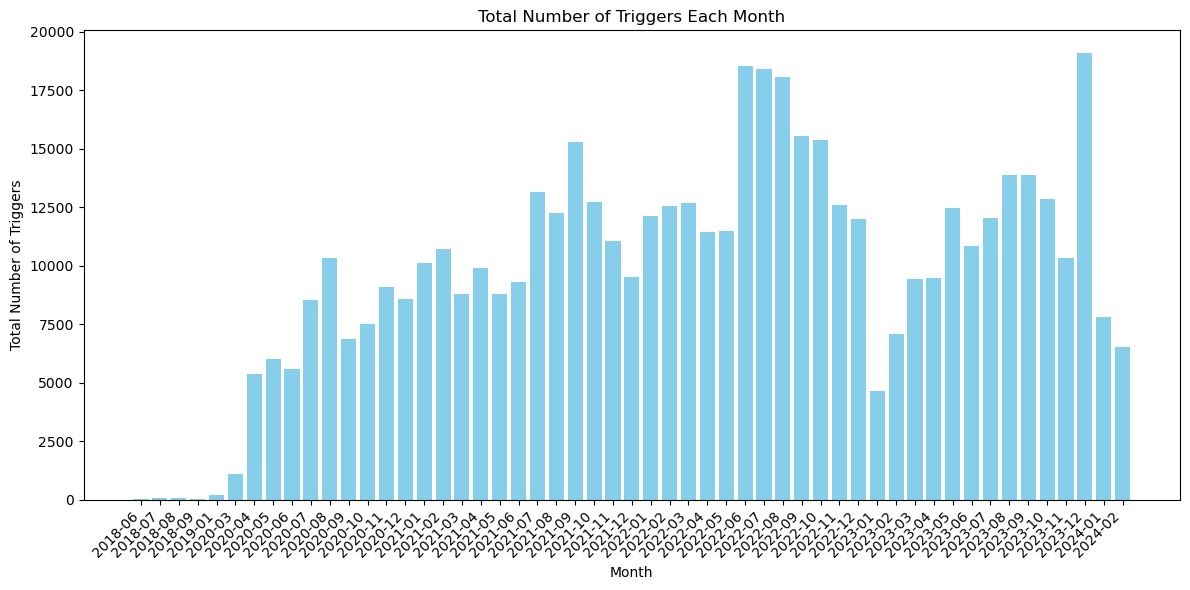

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

file_path = '/Volumes/Marco/SeismicDataTEXAS/PB28/20232024/trigger_info_PB28.csv'  
df = pd.read_csv(file_path)

# Convert 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Create a new column for the month
df['Month'] = df['Start_Time'].dt.to_period('M')

# Group by month and sum the number of triggers
monthly_totals = df.groupby('Month')['Number_of_Triggers'].sum()

# Print the month and the total number of triggers
#for month, triggers in zip(monthly_totals.index.astype(str), monthly_totals):
    #print(f"Month: {month}, Total Number of Triggers: {triggers}")

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(monthly_totals.index.astype(str), monthly_totals, color='skyblue')

ax.set_xlabel('Month')
ax.set_ylabel('Total Number of Triggers')
ax.set_title('Total Number of Triggers Each Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()



In [99]:
from IPython.display import display, Markdown

# Your subtitle text
subtitle = "TXT METHOD"

# Display the subtitle using Markdown
display(Markdown(f"## {subtitle}"))

## TXT METHOD

In [34]:
import pandas as pd

file_path = '/Volumes/Marco/SeismicDataTEXAS/trigger_info.csv'  
df = pd.read_csv(file_path)

# Convert 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Create a new column for the month
df['Month'] = df['Start_Time'].dt.to_period('M')

# Save the DataFrame as a text file
df.to_csv('/Volumes/Marco/SeismicDataTEXAS/trigger_info.txt', header=True, index=False, sep='\t')

# Display the first few rows of the DataFrame
print(df.head())


                                            SAC_file Station Start_Time  \
0  /Volumes/Marco/SeismicData/2022-01-01-31/TX.PB...    PB28 2022-01-01   
1  /Volumes/Marco/SeismicData/2022-01-01-31/TX.PB...    PB28 2022-01-02   
2  /Volumes/Marco/SeismicData/2022-01-01-31/TX.PB...    PB28 2022-01-03   
3  /Volumes/Marco/SeismicData/2022-01-01-31/TX.PB...    PB28 2022-01-04   
4  /Volumes/Marco/SeismicData/2022-01-01-31/TX.PB...    PB28 2022-01-05   

                      End_Time  Number_of_Triggers  \
0  2022-01-02T00:00:00.000000Z                 123   
1  2022-01-03T00:00:00.000000Z                 159   
2  2022-01-04T00:00:00.000000Z                 521   
3  2022-01-05T00:00:00.000000Z                  97   
4  2022-01-06T00:00:00.000000Z                 159   

                                       Trigger_Times    Month  
0  [86550 86759], [102561 102828], [140333 140618...  2022-01  
1  [1018202 1018578], [1200875 1201204], [1587656...  2022-01  
2  [4239 4438], [29112 29300], [

Month: 2018-06, Total Number of Triggers: 29
Month: 2018-07, Total Number of Triggers: 57
Month: 2018-08, Total Number of Triggers: 76
Month: 2018-09, Total Number of Triggers: 18
Month: 2019-01, Total Number of Triggers: 35
Month: 2020-03, Total Number of Triggers: 1119
Month: 2020-04, Total Number of Triggers: 5362
Month: 2020-05, Total Number of Triggers: 6004
Month: 2020-06, Total Number of Triggers: 5589
Month: 2020-07, Total Number of Triggers: 8551
Month: 2020-08, Total Number of Triggers: 10327
Month: 2020-09, Total Number of Triggers: 6879
Month: 2020-10, Total Number of Triggers: 7508
Month: 2020-11, Total Number of Triggers: 9102
Month: 2020-12, Total Number of Triggers: 8587
Month: 2021-01, Total Number of Triggers: 10108
Month: 2021-02, Total Number of Triggers: 10703
Month: 2021-03, Total Number of Triggers: 8787
Month: 2021-04, Total Number of Triggers: 9907
Month: 2021-05, Total Number of Triggers: 8775
Month: 2021-06, Total Number of Triggers: 9317
Month: 2021-07, Tota

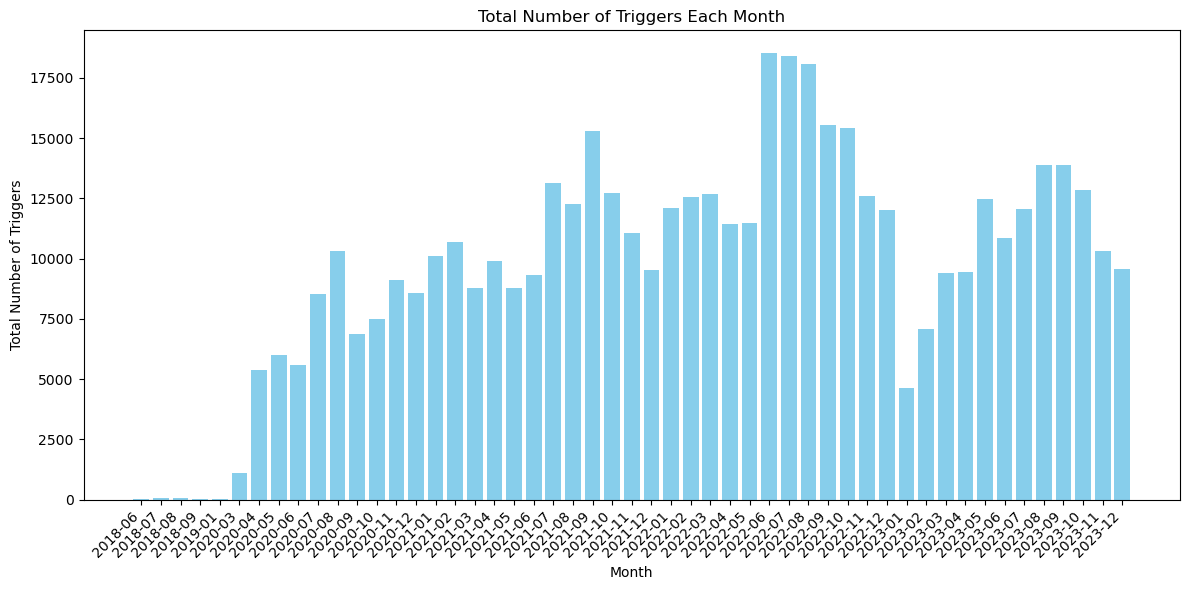

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

file_path = '/Volumes/Marco/SeismicDataTEXAS/trigger_info.txt'  # Update with the correct text file path
df = pd.read_csv(file_path, sep='\t')

# Convert 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S.%f')

# Create a new column for the month
df['Month'] = df['Start_Time'].dt.to_period('M')

# Group by month and sum the number of triggers
monthly_totals = df.groupby('Month')['Number_of_Triggers'].sum()

# Print the month and the total number of triggers
#print(f"Month: {month}, Total Number of Triggers: {triggers}")

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(monthly_totals.index.astype(str), monthly_totals, color='skyblue')

ax.set_xlabel('Month')
ax.set_ylabel('Total Number of Triggers')
ax.set_title('Total Number of Triggers Each Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


In [98]:
from IPython.display import display, Markdown

# Your subtitle text
subtitle = "Remove missing months of Data"

# Display the subtitle using Markdown
display(Markdown(f"## {subtitle}"))

## Remove missing months of Data

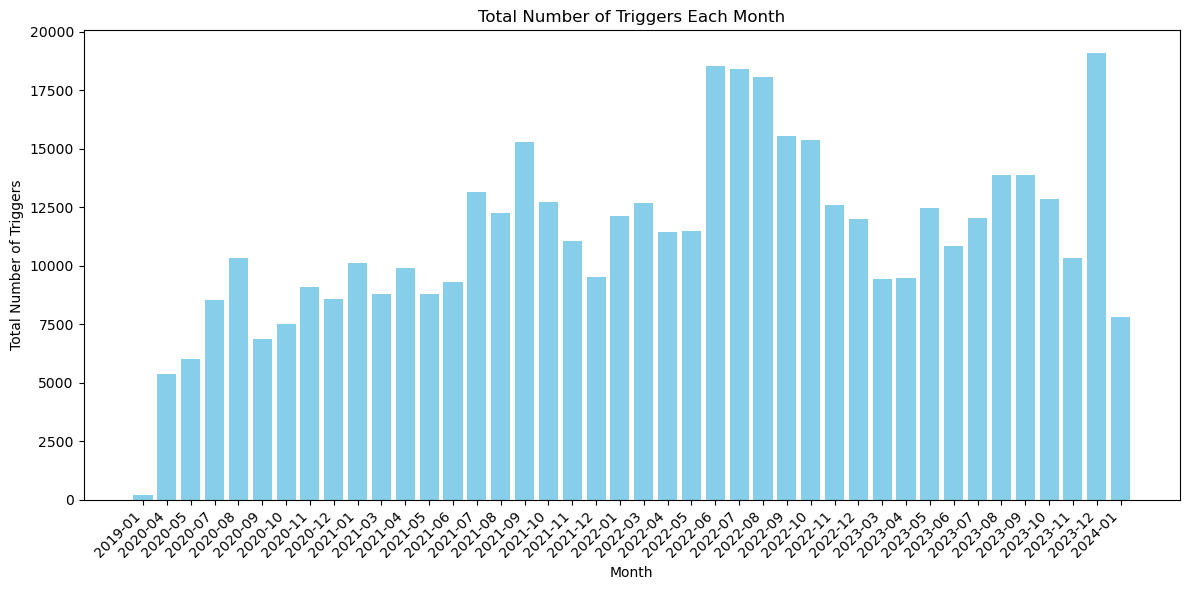

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

file_path = '/Volumes/Marco/SeismicDataTEXAS/PB28/20232024/trigger_info_PB28.csv'  
df = pd.read_csv(file_path)

# Convert 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Create a new column for the month
df['Month'] = df['Start_Time'].dt.to_period('M')

# Group by month and count the number of unique days within each month
monthly_day_counts = df.groupby('Month')['Start_Time'].agg(lambda x: x.dt.day.nunique())

# Filter months with at least 25 unique days
valid_months = monthly_day_counts[monthly_day_counts >= 30].index

# Filter the original DataFrame to include only data for valid months
df_filtered = df[df['Month'].isin(valid_months)]

# Group by month and sum the number of triggers for the filtered DataFrame
monthly_totals = df_filtered.groupby('Month')['Number_of_Triggers'].sum()

# Print the month and the total number of triggers
#for month, triggers in zip(monthly_totals.index.astype(str), monthly_totals):
    #print(f"Month: {month}, Total Number of Triggers: {triggers}")

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(monthly_totals.index.astype(str), monthly_totals, color='skyblue')

ax.set_xlabel('Month')
ax.set_ylabel('Total Number of Triggers')
ax.set_title('Total Number of Triggers Each Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.savefig('triggers.png')
plt.show()

In [109]:
from IPython.display import display, Markdown

# Your subtitle text
subtitle = "Plot Oil crude prices"

# Display the subtitle using Markdown
display(Markdown(f"## {subtitle}"))

## Plot Oil crude prices

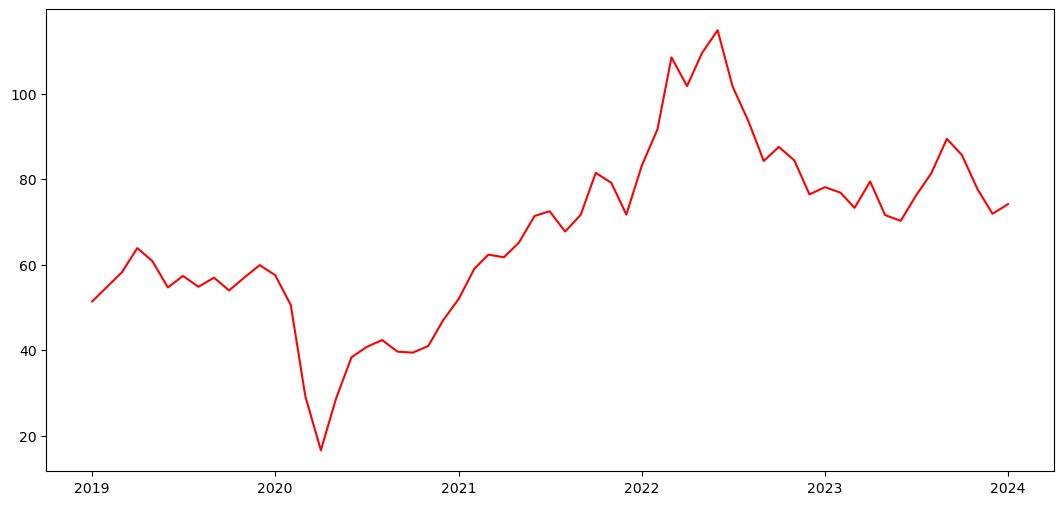

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = '/Volumes/Marco/SeismicDataTEXAS/oil_price.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for the desired time range (2019 to 2024)
data = data[(data['Date'].dt.year >= 2019) & (data['Date'].dt.year <= 2024)]

# Extract the specified columns with corrected names
specified_columns = ['Date', 'Data 1: Crude Oil RBRTE']

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(13, 6))
for column in specified_columns[1:]:
    plt.plot(data.index, data[column], label=column, color='red')

# Turn off grid
plt.grid(False)

# Save the plot with transparent background
plt.savefig('oilprice.png', transparent=True)

# Show the plot
plt.show()





In [110]:
from IPython.display import display, Markdown

# Your subtitle text
subtitle = "Plot Oil prices vs Events"

# Display the subtitle using Markdown
display(Markdown(f"## {subtitle}"))

## Plot Oil prices vs Events

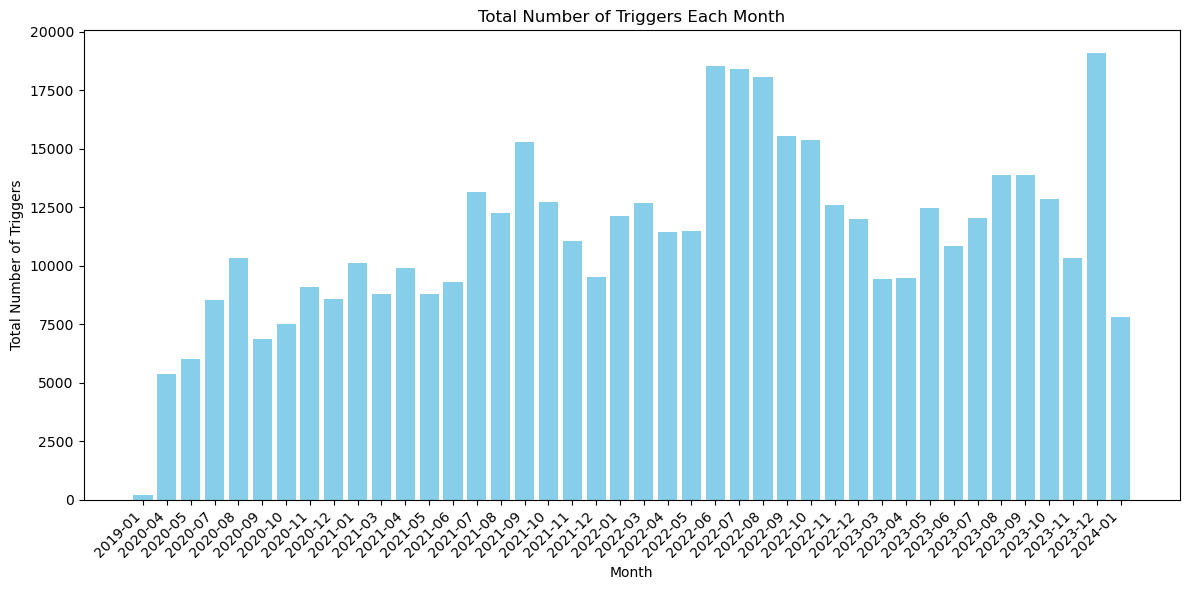

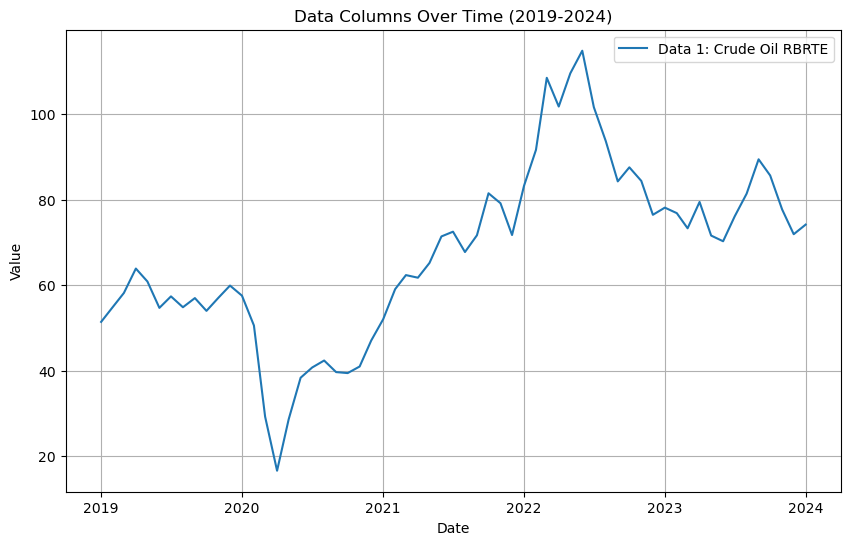

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

file_path = '/Volumes/Marco/SeismicDataTEXAS/PB28/20232024/trigger_info_PB28.csv'  
df = pd.read_csv(file_path)

# Convert 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Create a new column for the month
df['Month'] = df['Start_Time'].dt.to_period('M')

# Group by month and count the number of unique days within each month
monthly_day_counts = df.groupby('Month')['Start_Time'].agg(lambda x: x.dt.day.nunique())

# Filter months with at least 25 unique days
valid_months = monthly_day_counts[monthly_day_counts >= 30].index

# Filter the original DataFrame to include only data for valid months
df_filtered = df[df['Month'].isin(valid_months)]

# Group by month and sum the number of triggers for the filtered DataFrame
monthly_totals = df_filtered.groupby('Month')['Number_of_Triggers'].sum()

# Print the month and the total number of triggers
#for month, triggers in zip(monthly_totals.index.astype(str), monthly_totals):
    #print(f"Month: {month}, Total Number of Triggers: {triggers}")

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(monthly_totals.index.astype(str), monthly_totals, color='skyblue')

ax.set_xlabel('Month')
ax.set_ylabel('Total Number of Triggers')
ax.set_title('Total Number of Triggers Each Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

# File path
file_path = '/Volumes/Marco/SeismicDataTEXAS/oil_price.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for the desired time range (2019 to 2024)
data = data[(data['Date'].dt.year >= 2019) & (data['Date'].dt.year <= 2024)]

# Extract the specified columns with corrected names
specified_columns = ['Date', 'Data 1: Crude Oil RBRTE']

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
for column in specified_columns[1:]:
    plt.plot(data.index, data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Data Columns Over Time (2019-2024)')
plt.legend()
plt.grid(True)
plt.show()


In [111]:
from IPython.display import display, Markdown

# Your subtitle text
subtitle = "Envents of a month in day time range"

# Display the subtitle using Markdown
display(Markdown(f"## {subtitle}"))

## Envents of a month in day time range

Index(['SAC_file', 'Station', 'Start_Time', 'End_Time', 'Number_of_Triggers',
       'Trigger_Times'],
      dtype='object')
Trigger Times from July 2022:


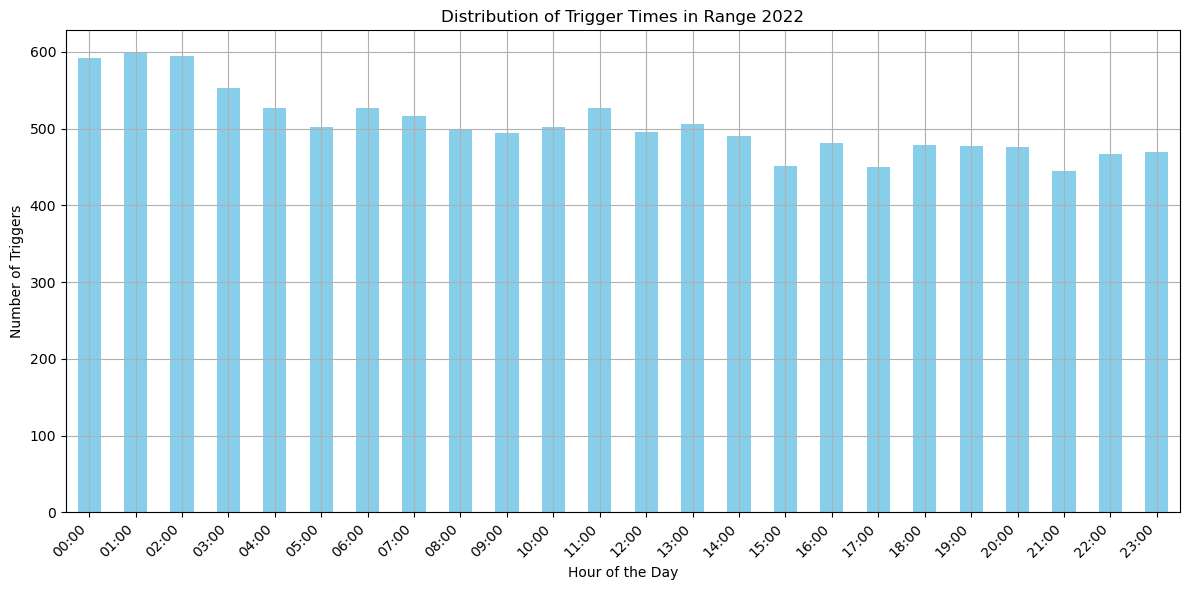

In [112]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

file_path = '/Volumes/Marco/SeismicDataTEXAS/PB28/20232024/trigger_info_PB28.csv'

# Read the CSV file
df = pd.read_csv(file_path, sep=',')
print(df.columns)

# Convert 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Define the selected month range
selected_month = pd.Timestamp('2022-01-01', tz='UTC')  # Ensure timezone is set to UTC
end_of_month = pd.Timestamp('2022-01-31', tz='UTC')

# Filter rows based on the selected month range
filtered_df = df[(df['Start_Time'] >= selected_month) & (df['Start_Time'] <= end_of_month)]

def seconds_to_timestamp(seconds):
    delta = timedelta(seconds=seconds)
    midnight = datetime.combine(datetime.today(), datetime.min.time())
    timestamp = midnight + delta
    return timestamp.strftime('%H:%M:%S')

# Print the Trigger_Times column
print("Trigger Times from July 2022:")
trigger_times_list = []
for trigger_times in filtered_df['Trigger_Times']:
    if isinstance(trigger_times, str):
        trigger_times = trigger_times.strip('[]').split('], [')
        for trigger_time in trigger_times:
            time_str = trigger_time.split()[0][1:]
            timestamp = seconds_to_timestamp(int(time_str))
            trigger_times_list.append(timestamp)
            
# Convert trigger times to datetime objects
trigger_times_datetime = [datetime.strptime(time, '%H:%M:%S') for time in trigger_times_list]

# Create a DataFrame with trigger times as index
trigger_df = pd.DataFrame(index=trigger_times_datetime)

# Resample the data to hourly intervals and count the number of events in each hour
hourly_counts = trigger_df.resample('H').size()

# Plotting the hourly trigger counts as a bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot a bar graph of hourly trigger counts
hourly_counts.plot(kind='bar', color='skyblue', ax=ax)

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Triggers')
ax.set_title('Distribution of Trigger Times in Range 2022')

# Customize x-axis labels to show the start time of each hour bracket
hour_labels = [hour.strftime('%H:%M') for hour in hourly_counts.index]
ax.set_xticklabels(hour_labels)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()
